In [1]:
%pip install pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Step 1: Load the Dataset

In [3]:
data = pd.read_csv("../input/online_retail.csv")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step 2: Clean the Data

### Drop rows with missing values

In [4]:
data.dropna(subset=["Description", "Quantity", "UnitPrice", "CustomerID"], inplace=True)

### Convert InvoiceDate to datetime

In [5]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

### Convert CustomerID from float to int

In [6]:
data['CustomerID'] = data['CustomerID'].astype(int)

# Step 3: Add a Total Sales Column

In [7]:
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Step 4: Save the processed dataset to a CSV file

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [9]:
data.to_csv('../input/processed_online_retail.csv', index=False) 

# Step 5: Visualizations

### a) Sales Distribution per Country

/tmp/ipykernel_173395/3886700191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette="viridis")


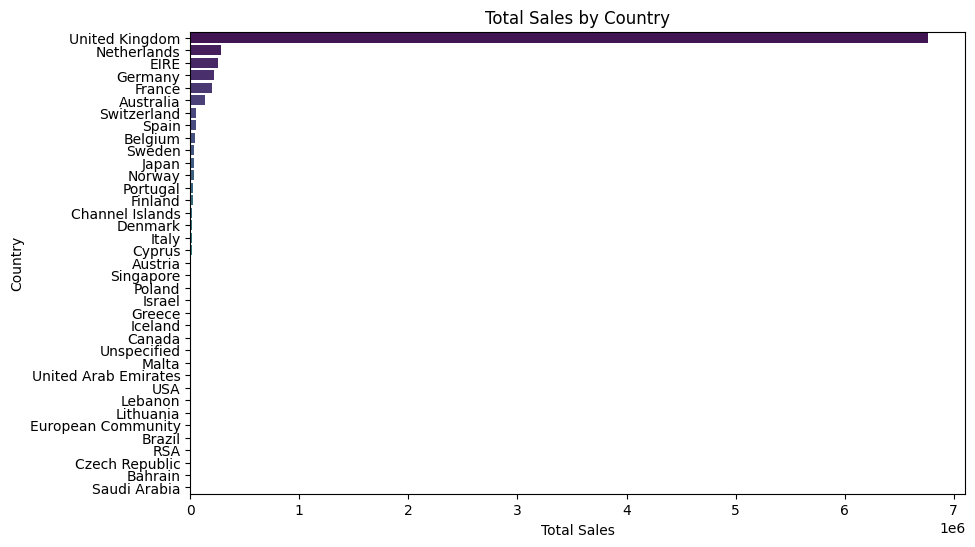

In [10]:
country_sales = data.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_sales.values, y=country_sales.index, palette="viridis")
plt.title("Total Sales by Country")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

### b) Most Sold Products

/tmp/ipykernel_173395/1864411514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette="magma")


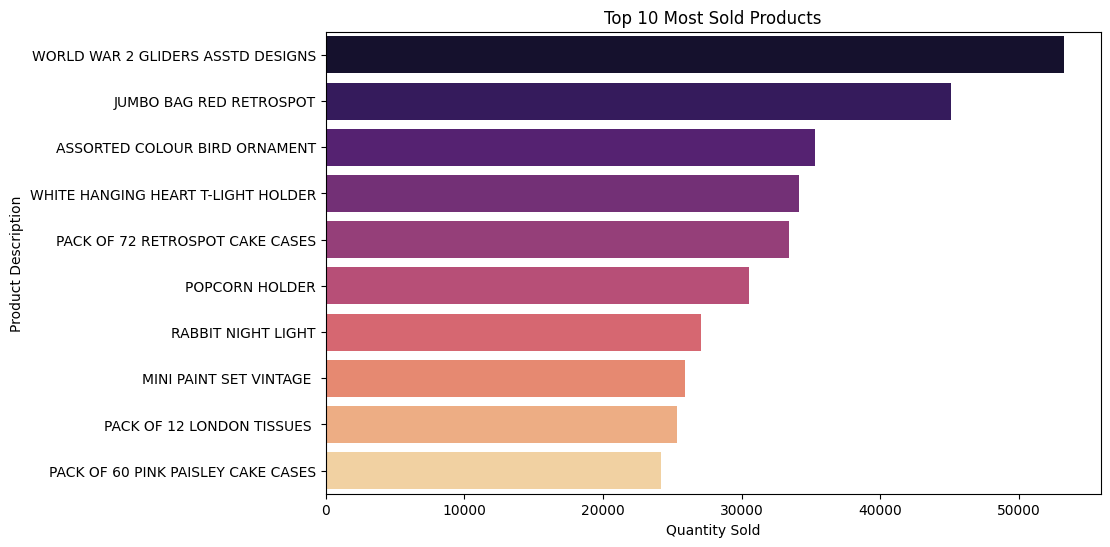

In [11]:
product_sales = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette="magma")
plt.title("Top 10 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Description")
plt.show()

### c) Revenue Over Time

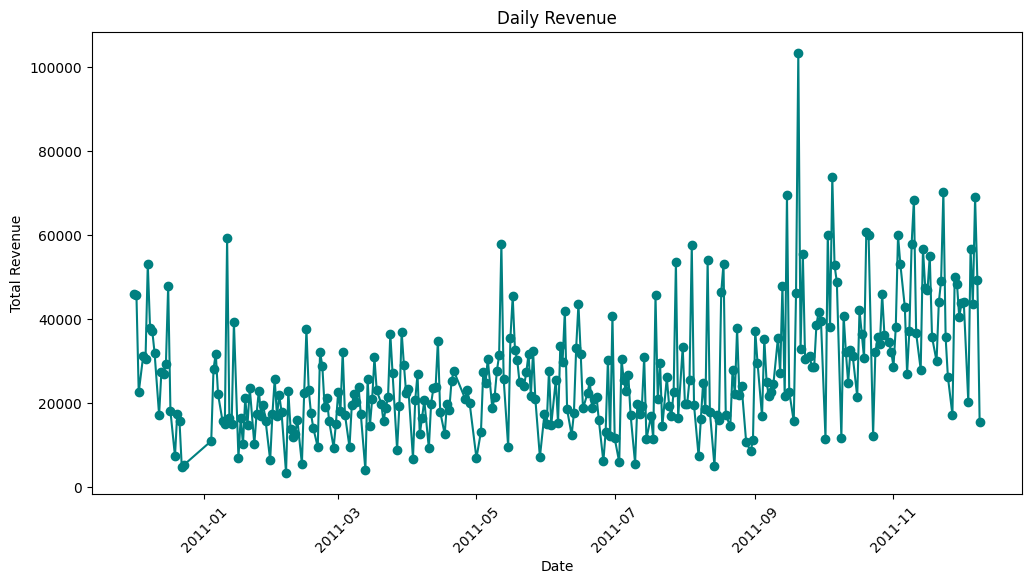

In [12]:
daily_revenue = data.groupby(data['InvoiceDate'].dt.date)['TotalSales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', color='teal')
plt.title("Daily Revenue")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Step 6: Statistical Tests

### a) Correlation between Quantity and UnitPrice

In [13]:
correlation = data['Quantity'].corr(data['UnitPrice'])
print(f"Correlation between Quantity and UnitPrice: {correlation:.2f}")

Correlation between Quantity and UnitPrice: -0.00


### b) t-test: Average sales difference between UK and Germany

In [14]:
uk_sales = data[data['Country'] == "United Kingdom"]['TotalSales']
germany_sales = data[data['Country'] == "Germany"]['TotalSales']

t_stat, p_value = ttest_ind(uk_sales, germany_sales, equal_var=False)
print(f"T-test between UK and Germany sales:")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

T-test between UK and Germany sales:
T-statistic: -5.51, P-value: 0.0000


# Step 6: Interpretation of Results

#### **1. Correlation between `Quantity` and `UnitPrice`: -0.00**
- A correlation coefficient of **-0.00** indicates **no linear relationship** between the quantity of products sold and their unit price.
- This suggests that the quantity of products sold is not directly influenced by their price in this dataset.

#### **2. T-Test between UK and Germany Sales**
- **T-Statistic**: -5.51 indicates a significant difference between the average sales in the UK and Germany.
- **P-value**: 0.0000 (very small) suggests that the difference is statistically significant at any common significance level (e.g., 0.05).
  
   **Conclusion**:
   - The average sales in the UK and Germany are significantly different.
   - This could be due to differences in purchasing behavior, the number of customers, or other country-specific factors.